VISHWANTH P 21MIS1117 - KMeans Clustering

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv(r'C:\Users\admin\Desktop\21MIS1117\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Check the standardized data
pd.DataFrame(scaled_features, columns=features.columns).head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [48]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

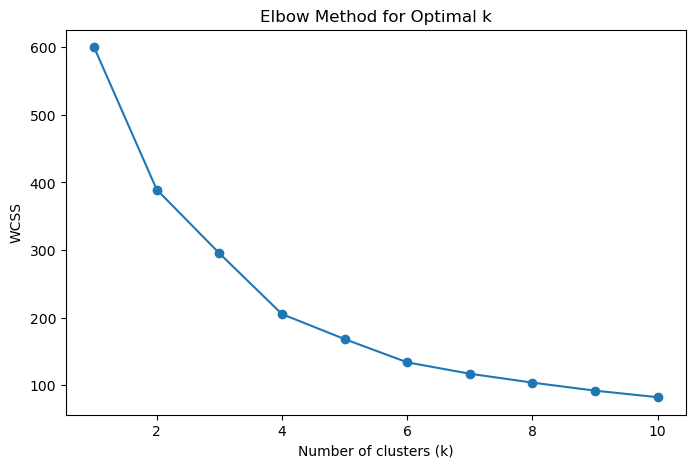

In [49]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [50]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


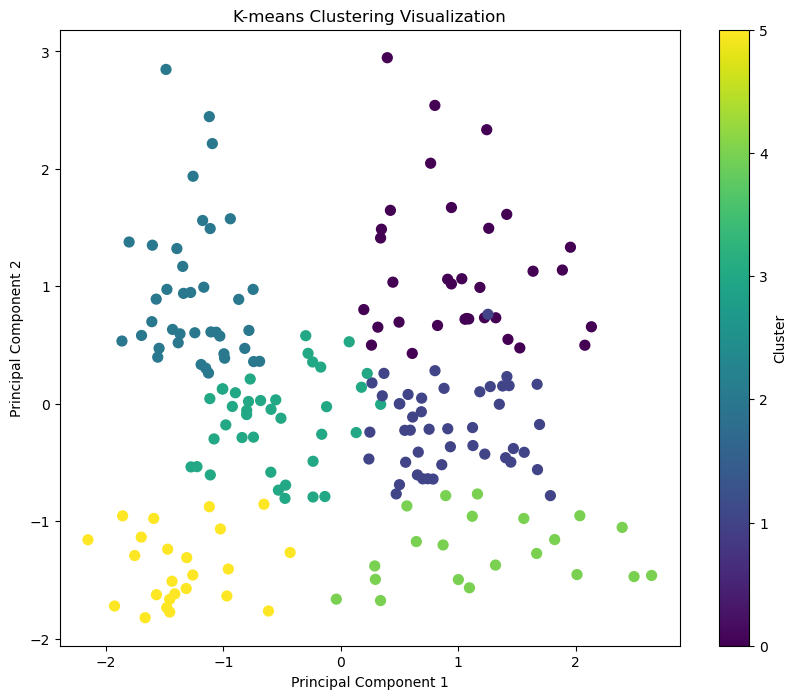

In [51]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [52]:
#Accuracy
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score (Accuracy): {silhouette_avg}')

Silhouette Score (Accuracy): 0.42742814991580175


In [53]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)
print(df['Cluster'].value_counts())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        165.303030  0.424242  41.939394           88.939394   
1         83.777778  0.577778  56.333333           54.266667   
2        162.000000  0.538462  32.692308           86.538462   
3         92.552632  0.631579  26.684211           57.578947   
4         23.190476  0.619048  45.523810           26.285714   
5         23.041667  0.583333  25.250000           25.833333   

         Spending Score (1-100)  
Cluster                          
0                     16.969697  
1                     49.066667  
2                     82.128205  
3                     47.789474  
4                     19.380952  
5                     76.916667  
Cluster
1    45
2    39
3    38
0    33
5    24
4    21
Name: count, dtype: int64


Interpretation: 

High Income, Low Spending (Cluster 0): Target with personalized promotions to increase engagement.

Moderate Income and Spending (Cluster 1): Offer value-oriented products and maintain engagement with consistent offers.

Young, High Spending (Cluster 2): Focus on high-impact, trendy products and exclusive deals.

Young, Moderate Spending (Cluster 3): Engage with youthful trends and emerging preferences.

Low Income, Low Spending (Cluster 4): Provide cost-effective solutions and budget-friendly offers.

Young, High Spending (Cluster 5): Cater to their high engagement level with targeted promotions despite their lower income.